# INTRODUCTION
This project aims to analyze traffic volume on the i-94 interstate highway by incorporatiing a variety of factors such as holiday, weather condition, time of day, etc.
The dataset to be used was gotten from kaggle and contains hourly data from 2012 to 2018

In [1]:
# importing my libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv')
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [3]:
df.set_index('date_time', inplace=True)

In [4]:
df

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,,
02-10-2012 09:00,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds
02-10-2012 10:00,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds
02-10-2012 11:00,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds
02-10-2012 12:00,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds
02-10-2012 13:00,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds
...,...,...,...,...,...,...,...,...
30-09-2018 19:00,3543,None,283.45,0.0,0.0,75,Clouds,broken clouds
30-09-2018 20:00,2781,None,282.76,0.0,0.0,90,Clouds,overcast clouds
30-09-2018 21:00,2159,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm


In [5]:
df.shape

(48204, 8)

In [6]:
df.columns

Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description'],
      dtype='object')

In [7]:
df.isnull().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48204 entries, 02-10-2012 09:00 to 30-09-2018 23:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              48204 non-null  object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [9]:
df.dtypes

traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
dtype: object

In [10]:
df.holiday.value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [11]:
df.weather_main.value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [12]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


# Exploratory Data Analysis
trying to check the relationship between different features

In [13]:
df.traffic_volume.value_counts()

353     50
356     50
340     47
351     44
373     42
        ..
6953     1
2057     1
2585     1
7118     1
2346     1
Name: traffic_volume, Length: 6704, dtype: int64

# Traffic flow

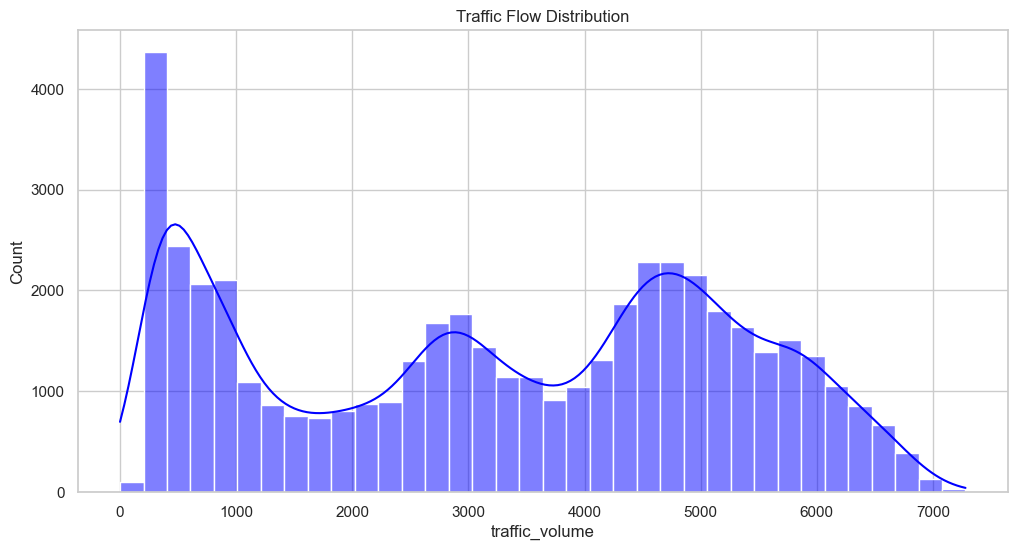

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.histplot(df['traffic_volume'], color='blue', kde=True)
plt.title('Traffic Flow Distribution')
plt.show()

# Weather category

plt.figure(figsize=(8,4))
sns.countplot(y='weather_main', data=df, palette='plasma')
plt.title('Weather Category')
plt.show()

# Knowing the Traffic volume that exist on various Holiday

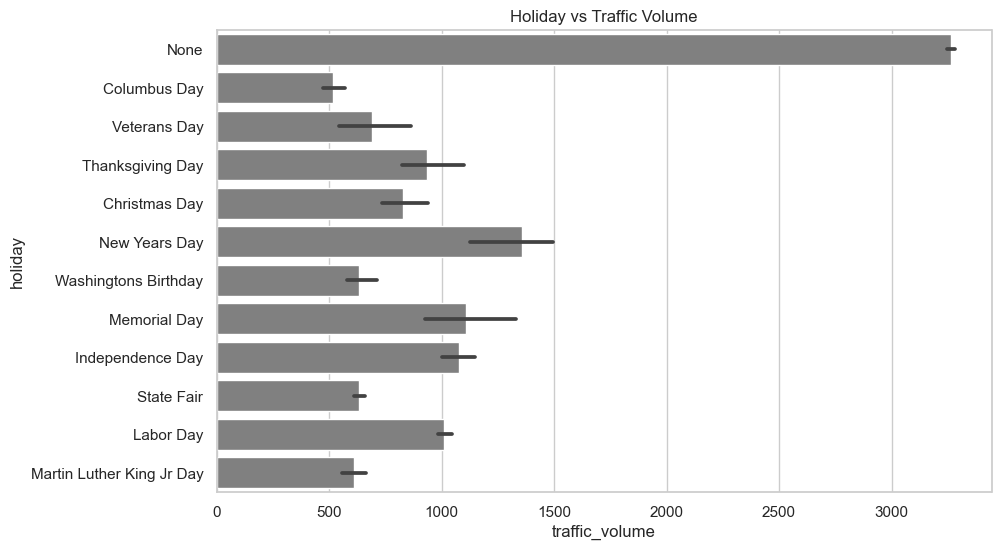

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='traffic_volume', y='holiday', data=df, color='grey')
plt.title('Holiday vs Traffic Volume')
plt.show()

# Relationship between The Average Temperature in kelvin and Traffic volume

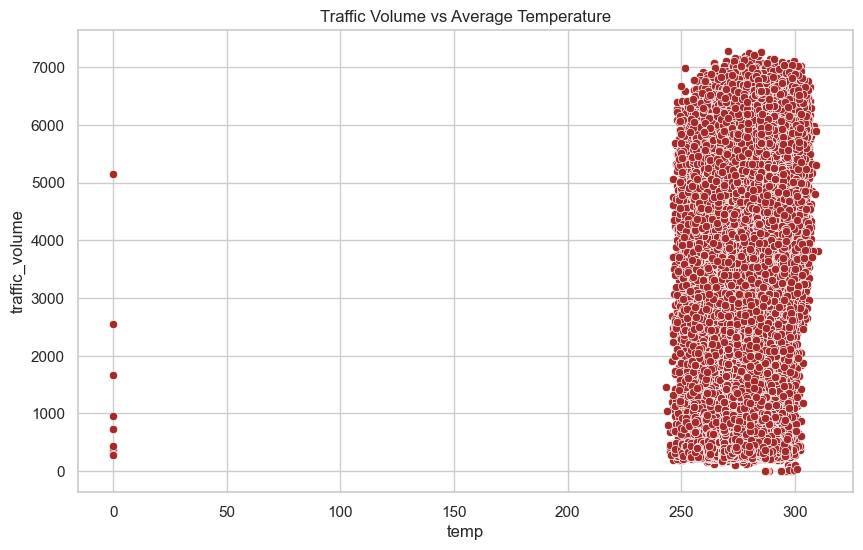

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='traffic_volume', data=df, color='brown')
plt.title('Traffic Volume vs Average Temperature')
plt.show()